Load Data

In [2]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [1]:
import pandas as pd
df = pd.read_csv('tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


EDA

C:\Users\nunoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Perbandingan Data Setiap Kelas')

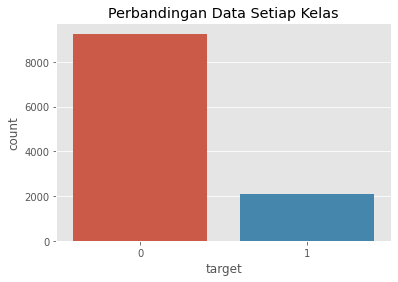

In [3]:
sns.countplot('target', data=df)
plt.title('Perbandingan Data Setiap Kelas')

In [5]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

Preprocessing Data

In [6]:
import nltk
from nltk.corpus import stopwords
import string
import re

#mengubah semua menjadi lower case 
df['text_prep'] = df['text'].str.lower()
#menghilangkan single karakter
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
df['text_prep'] = df['text_prep'].apply(remove_singl_char)
#menghilangkan simbol
df['text_prep'] = df['text_prep'].str.replace("[^A-Za-z\s]+"," ")

C:\Users\nunoh\AppData\Local\Temp\ipykernel_28564\3188460789.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_prep'] = df['text_prep'].str.replace("[^A-Za-z\s]+"," ")


In [7]:
#menghilangkan stopword
list_stopwords =  stopwords.words('english')
df['text_prep'] = df['text_prep'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list_stopwords)]))

In [11]:
df

,id,keyword,location,text,target,text_prep
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence bhainsa telangana stones pel...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section imposed bhainsa january clas...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze dealership https co ...
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze dealership https co ...
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus love brings freedom pardon fill hol...
...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,media warned us well advance wrecked whole nig...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok remember outcast nd dora au au wrecked nerv...


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [12]:
token = Tokenizer()
token.fit_on_texts(df['text_prep'])

In [13]:
vocab_size = len(token.word_index) + 1
vocab_size

27390

In [15]:
text_code = token.texts_to_sequences(df['text_prep'])

In [16]:
max_length = 45
X = pad_sequences(text_code, maxlen=max_length, padding='post')

In [17]:
X

array([[ 4177,   648,  1502, ...,     0,     0,     0],
       [ 1311,  2165,  6711, ...,     0,     0,     0],
       [ 1503,  2375,  1128, ...,     0,     0,     0],
       ...,
       [  147,  1687,   298, ...,     0,     0,     0],
       [  398,   131,  6913, ...,     0,     0,     0],
       [27387, 27388,   752, ...,     0,     0,     0]])

In [20]:
y = df['target']

In [18]:
X.shape

(11370, 45)

In [21]:
y.shape

(11370,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [23]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 100)           2739000   
                                                                 
 conv1d (Conv1D)             (None, 44, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 32)            0         
                                                                 
 dense (Dense)               (None, 22, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 22, 32)            0         
                                                        

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
285/285 [==============================] - 11s 33ms/step - loss: 0.4875 - accuracy: 0.8141 - val_loss: 0.5360 - val_accuracy: 0.8140
Epoch 2/5
285/285 [==============================] - 9s 31ms/step - loss: 0.4147 - accuracy: 0.8284 - val_loss: 0.3525 - val_accuracy: 0.8769
Epoch 3/5
285/285 [==============================] - 8s 30ms/step - loss: 0.2611 - accuracy: 0.8996 - val_loss: 0.3087 - val_accuracy: 0.8720
Epoch 4/5
285/285 [==============================] - 8s 30ms/step - loss: 0.1593 - accuracy: 0.9433 - val_loss: 0.3020 - val_accuracy: 0.8769
Epoch 5/5
285/285 [==============================] - 9s 32ms/step - loss: 0.0924 - accuracy: 0.9698 - val_loss: 0.3316 - val_accuracy: 0.8676


In [26]:
p_predicted = np.argmax(model.predict(X_test),axis=1)
p_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,p_predicted)

0.8139841688654353